In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
# sys.path.insert(0,'..')
# from notebookFunctions import *
# from .. import notebookFunctions
from Bio.PDB.Polypeptide import one_to_three
from Bio.PDB.Polypeptide import three_to_one
from Bio.PDB.PDBParser import PDBParser
from pyCodeLib import *
from small_script.myFunctions import *
from collections import defaultdict
%matplotlib inline
# plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
plt.rcParams['figure.figsize'] = np.array([16.18033, 10])    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 22})

In [16]:
parser = PDBParser(QUIET=True)
# rotate then shift
fileName = "/Users/weilu/Research/server/jan_2020/include_small_molecular/create_extended_structure/chainE.pdb"
rotation_all = np.arange(0, 180, 30)
# z_shift_all = np.arange(-20, 20, 4)
# x_shift_all = np.arange(20, 40, 10)
x_shift_all = [50]
rotation_axis=Vector(0,0,1)
for x_shift in x_shift_all:
    for degree in rotation_all:
        structure = parser.get_structure("X", fileName)

        radian=math.radians(degree)
        # Iterate through all atoms and rotate by 90 degress
        rotation_matrix = rotaxis2m(radian, rotation_axis)
        translation_matrix = np.array((0, 0, 0), 'f')
        for atom in structure.get_atoms():
            # print(atom.get_coord())
            atom.transform(rotation_matrix, translation_matrix)
            
            
            
        rotation_matrix = rotaxis2m(0, rotation_axis)
        translation=(x_shift, 0, 0)
        translation_matrix = np.array(translation, 'f')
        for atom in structure.get_atoms():
            # print(atom.get_coord())
            atom.transform(rotation_matrix, translation_matrix)
        # degree = 360
        # degree = 0

        saveFile = f"/Users/weilu/Research/server/jan_2020/include_small_molecular/create_extended_structure/4TH_centered_{x_shift}_{degree}.pdb"
        io = PDBIO()
        io.set_structure(structure)
        io.save(saveFile, preserve_atom_numbering=True)

In [18]:
pre = "/Users/weilu/Research/server/jan_2020/include_small_molecular/create_extended_structure/"
do = os.system
to_pre = "/Users/weilu/Research/server/jan_2020/include_small_molecular/my_ABCDE_with_ligand/"
for x_shift in x_shift_all:
    for degree in rotation_all:
        do(f"cat {pre}/chainABCD.pdb > {to_pre}/separate_4TH_centered_{x_shift}_{degree}-openmmawsem.pdb")
        do(f"sed '$d' {pre}/4TH_centered_{x_shift}_{degree}.pdb >> {to_pre}/separate_4TH_centered_{x_shift}_{degree}-openmmawsem.pdb")
        # do(f"cat {pre}/4TH_centered_{x_shift}_{degree}.pdb >> {to_pre}/separate_4TH_centered_{x_shift}_{degree}-openmmawsem.pdb")
        do(f"cat {pre}/ligands.pdb >> {to_pre}/separate_4TH_centered_{x_shift}_{degree}-openmmawsem.pdb")

In [7]:
a = "asdf-openmmawsem.pdb"

In [13]:
suffix = "-openmmawsem.pdb"

In [15]:
a[-len(suffix):]

'-openmmawsem.pdb'

In [12]:
a[-16:]

'-openmmawsem.pdb'

In [ ]:
fileName = "/Users/weilu/Research/server/dec_2019/cornichon_complete/cleaned_pdbs/6ud8_ABCDF_embeded.pdb"
s = parser.get_structure("X", fileName)

In [109]:
# rotate then shift
fileName = "/Users/weilu/Research/server/jan_2020/cornichon/create_extended_structure/chainE_centered_done.pdb"
rotation_all = np.arange(0, 180, 30)
# z_shift_all = np.arange(-20, 20, 4)
# x_shift_all = np.arange(20, 40, 10)
x_shift_all = [50]
rotation_axis=Vector(0,0,1)
for x_shift in x_shift_all:
    for degree in rotation_all:
        structure = parser.get_structure("X", fileName)

        radian=math.radians(degree)
        # Iterate through all atoms and rotate by 90 degress
        rotation_matrix = rotaxis2m(radian, rotation_axis)
        translation_matrix = np.array((0, 0, 0), 'f')
        for atom in structure.get_atoms():
            # print(atom.get_coord())
            atom.transform(rotation_matrix, translation_matrix)
            
            
            
        rotation_matrix = rotaxis2m(0, rotation_axis)
        translation=(x_shift, 0, 0)
        translation_matrix = np.array(translation, 'f')
        for atom in structure.get_atoms():
            # print(atom.get_coord())
            atom.transform(rotation_matrix, translation_matrix)
        # degree = 360
        # degree = 0

        saveFile = f"/Users/weilu/Research/server/jan_2020/cornichon/create_extended_structure/4TH_centered_{x_shift}_{degree}.pdb"
        io = PDBIO()
        io.set_structure(structure)
        io.save(saveFile, preserve_atom_numbering=True)

In [110]:
pre = "/Users/weilu/Research/server/jan_2020/cornichon/create_extended_structure/"
do = os.system
to_pre = "/Users/weilu/Research/server/jan_2020/cornichon/setups/my_ABCDF"
for x_shift in x_shift_all:
    for degree in rotation_all:
        do(f"cat {pre}/chainABCD.pdb > {to_pre}/separate_4TH_centered_{x_shift}_{degree}-openmmawsem.pdb")
        do(f"cat {pre}/4TH_centered_{x_shift}_{degree}.pdb >> {to_pre}/separate_4TH_centered_{x_shift}_{degree}-openmmawsem.pdb")

In [97]:
fileName = "/Users/weilu/Research/server/dec_2019/cornichon_complete/create_extended_structure/chainE.pdb"
rotation_all = np.arange(0, 180, 30)
# z_shift_all = np.arange(-20, 20, 4)
# x_shift_all = np.arange(20, 40, 10)
x_shift_all = [30]
rotation_axis=Vector(0,0,1)
for x_shift in x_shift_all:
    for degree in rotation_all:
        structure = parser.get_structure("X", fileName)
        
        rotation_matrix = rotaxis2m(0, rotation_axis)
        translation=(x_shift, 0, 0)
        translation_matrix = np.array(translation, 'f')
        for atom in structure.get_atoms():
            # print(atom.get_coord())
            atom.transform(rotation_matrix, translation_matrix)
        # degree = 360
        # degree = 0
        radian=math.radians(degree)
        # Iterate through all atoms and rotate by 90 degress
        rotation_matrix = rotaxis2m(radian, rotation_axis)
        translation_matrix = np.array((0, 0, 0), 'f')
        for atom in structure.get_atoms():
            # print(atom.get_coord())
            atom.transform(rotation_matrix, translation_matrix)
        saveFile = f"/Users/weilu/Research/server/dec_2019/cornichon_complete/create_extended_structure/4TH_{x_shift}_{degree}.pdb"
        io = PDBIO()
        io.set_structure(structure)
        io.save(saveFile, preserve_atom_numbering=True)

In [102]:
pre = "/Users/weilu/Research/server/dec_2019/cornichon_complete/create_extended_structure/"
do = os.system
to_pre = "/Users/weilu/Research/server/dec_2019/cornichon_complete/setups/my_ABCDF"
for x_shift in x_shift_all:
    for degree in rotation_all:
        do(f"cat {pre}/chainABCD.pdb > {to_pre}/separate_4TH_{x_shift}_{degree}-openmmawsem.pdb")
        do(f"cat {pre}/4TH_{x_shift}_{degree}.pdb >> {to_pre}/separate_4TH_{x_shift}_{degree}-openmmawsem.pdb")

In [121]:
parser = PDBParser(QUIET=True)
fileName = "/Users/weilu/Research/server/jan_2020/include_small_molecular/cleaned_pdbs/chain_ABCD.pdb"
s = parser.get_structure("X", fileName)


class ResSelect(Select):
    def accept_residue(self, residue):
        try:
            if residue["CA"].get_coord()[2] < 32:
                return 1
            else:
                return 0
        except:
            if residue.id[0] == "H_ZK1":
                return 0
            else:
                return 1

io = PDBIO()
io.set_structure(s)
io.save('/Users/weilu/Research/server/jan_2020/include_small_molecular/cleaned_pdbs/ABCD_cutout_LBD.pdb', ResSelect())

In [5]:
parser = PDBParser(QUIET=True)

In [44]:
fileName = "/Users/weilu/Research/server/dec_2019/cornichon_complete/cleaned_pdbs/6ud8_ABCDF_embeded.pdb"
s = parser.get_structure("X", fileName)

In [114]:
res_list = list(s.get_residues())

In [117]:
res = res_list[-1]

('H_ZK1', 902, ' ')

In [46]:
class ResSelect(Select):
    def accept_residue(self, residue):
        if residue["CA"].get_coord()[2] < 30:
            return 1
        else:
            return 0

io = PDBIO()
io.set_structure(s)
io.save('/Users/weilu/Research/server/dec_2019/cornichon_complete/cleaned_pdbs/noFill_ABCDF_cutout_LBD.pdb', ResSelect())

In [39]:
fileName = "/Users/weilu/Research/server/dec_2019/cornichon_complete/cleaned_pdbs/6ud8_ABCD_embeded.pdb"
s = parser.get_structure("X", fileName)

In [40]:
class ResSelect(Select):
    def accept_residue(self, residue):
        if residue["CA"].get_coord()[2] < 30:
            return 1
        else:
            return 0

io = PDBIO()
io.set_structure(s)
io.save('/Users/weilu/Research/server/dec_2019/cornichon_complete/cleaned_pdbs/test.pdb', ResSelect())

In [7]:
fileName = "/Users/weilu/Research/server/dec_2019/cornichon/cleaned_pdbs/6ud8_F.pdb"
s = parser.get_structure("X", fileName)

In [25]:
seq = ""
topo = ""
for res in s.get_residues():
    if not is_hetero(res):
        # print(res)
        seq += three_to_one(res.get_resname())
        if res["CA"].get_coord()[2] < -15:
            topo += "0"
        elif res["CA"].get_coord()[2] > 15:
            topo += "2"
        else:
            topo += "1"

In [34]:
fileName = "/Users/weilu/Research/server/dec_2019/cornichon_complete/cleaned_pdbs/6ud8_F_complete.pdb"
s = parser.get_structure("X", fileName)

In [35]:
seq = ""
topo = ""
for res in s.get_residues():
    if not is_hetero(res):
        # print(res)
        seq += three_to_one(res.get_resname())
        if res["CA"].get_coord()[2] < -15:
            topo += "0"
        elif res["CA"].get_coord()[2] > 15:
            topo += "2"
        else:
            topo += "1"

In [36]:
with open("/Users/weilu/Research/server/dec_2019/cornichon_complete/TM_pred/crystal_topo_side", "w") as out:
    out.write(">CRYSTAL_STRUCTURE:A\n")
    out.write(seq+'\n')
    out.write(topo+"\n")

In [37]:
topo

'222211111111111111111111100000000000000000000000000000000000000000011111111111111111111111111111111111111000000000000000000000000000011111111111111111111112222222222222222222'

In [38]:
seq

'MAFTFAAFCYMLSLVLCAALIFFAIWHIIAFDELRTDFKSPIDQCNPVHARERLRNIERICFLLRKLVLPEYSIHSLFCIMFLCAQEWLTLGLNVPLLFYHFWRYFHCPADSSELAYDPPVVMNADTLSYCQKEAWCKLAFYLLSFFYYLYCMIYTLVSSGGRGGTETSQVAPA'

In [28]:
with open("/Users/weilu/Research/server/dec_2019/cornichon/TM_pred/crystal_topo_side", "w") as out:
    out.write(">CRYSTAL_STRUCTURE:A\n")
    out.write(seq+'\n')
    out.write(topo+"\n")

In [20]:
abs(res["CA"].get_coord()[2]) < 15

False

In [16]:
seq

'AFTFAAFCYMLSLVLCAALIFFAIWHIIAFDELRTDFKSPIDQCNPVHARERLRNIERICFLLRKLVLPEYSIHSLFCIMFLCAQEWLTLGLNVPLLFYHFWRYFHCPADSSELAYDPPVVMNADTLSYCQKEAWCKLAFYLLSFFYYLYCMIYTLVS'

In [17]:
res = list(s.get_residues())[0]

In [14]:
res.get_resname()

'DUM'

In [ ]:
three_to_one(res.get_resname())

In [20]:
# get the rnative.dat
fileName = "/Users/weilu/Research/server/jan_2020/include_small_molecular/rnative_generation/crystal_structure.pdb"
s = parser.get_structure("X", fileName)
all_res = s.get_residues()
regular_res_list = []
for res_i in all_res:
    if is_hetero(res_i):
        print("Problem", res_i, "is not a regualr res")
    else:
        regular_res_list.append(res_i)

n = len(regular_res_list)
r_matrix = np.zeros((n,n))
for i, res_i in enumerate(regular_res_list):
    if is_hetero(res_i):
        continue
    for j, res_j in enumerate(regular_res_list):
        if is_hetero(res_j):
            continue
        r_matrix[i][j] = res_i["CA"] - res_j["CA"]
# loss the constraint on the last chain
start = n-174
r_matrix[start:] = 0
r_matrix[:,start:] = 0
np.savetxt("/Users/weilu/Research/server/jan_2020/include_small_molecular/rnative_generation/rnative_without_last_chain_constraint.dat",
          r_matrix, fmt="%.3f")
r_matrix_crystal = r_matrix

Problem <Residue OLC het=H_OLC resseq=109 icode= > is not a regualr res
Problem <Residue OLC het=H_OLC resseq=108 icode= > is not a regualr res
Problem <Residue OLC het=H_OLC resseq=109 icode= > is not a regualr res
Problem <Residue OLC het=H_OLC resseq=108 icode= > is not a regualr res


In [ ]:
# use the one below is better.

In [24]:
# get the rnative.dat
fileName = "/Users/weilu/Research/server/jan_2020/include_small_molecular/rnative_generation/my_ABCDE_with_ligand-openmmawsem.pdb"
s = parser.get_structure("X", fileName)
all_res = s.get_residues()
regular_res_list = []
for res_i in all_res:
    if is_hetero(res_i):
        print("Problem", res_i, "is not a regualr res")
    else:
        regular_res_list.append(res_i)

n = len(regular_res_list)
r_matrix = np.zeros((n,n))
for i, res_i in enumerate(regular_res_list):
    if is_hetero(res_i):
        continue
    for j, res_j in enumerate(regular_res_list):
        if is_hetero(res_j):
            continue
        r_matrix[i][j] = res_i["CA"] - res_j["CA"]
np.savetxt("/Users/weilu/Research/server/jan_2020/include_small_molecular/rnative_generation/rnative_complete.dat",
          r_matrix, fmt="%.3f")
# loss the constraint on the last chain
start = n-174
r_matrix[start:] = 0
r_matrix[:,start:] = 0
np.savetxt("/Users/weilu/Research/server/jan_2020/include_small_molecular/rnative_generation/rnative_without_last_chain_constraint_from_openMM.dat",
          r_matrix, fmt="%.3f")
r_matrix_openmm = r_matrix

Problem <Residue OLC het=H_OLC resseq=901 icode= > is not a regualr res
Problem <Residue OLC het=H_OLC resseq=901 icode= > is not a regualr res
Problem <Residue OLC het=H_OLC resseq=901 icode= > is not a regualr res
Problem <Residue OLC het=H_OLC resseq=901 icode= > is not a regualr res
Problem <Residue CLR het=H_CLR resseq=201 icode= > is not a regualr res
Problem <Residue CLR het=H_CLR resseq=201 icode= > is not a regualr res
Problem <Residue CLR het=H_CLR resseq=201 icode= > is not a regualr res
Problem <Residue CLR het=H_CLR resseq=201 icode= > is not a regualr res


In [23]:
np.sum(r_matrix_crystal - r_matrix_openmm)

0.0

In [48]:
fileName = "/Users/weilu/Research/server/dec_2019/cornichon_complete/rnative_generation/crystal_structure.pdb"
s = parser.get_structure("X", fileName)

In [ ]:
is_hetero()

In [59]:
all_res = s.get_residues()
for res_i in all_res:
    if is_hetero(res_i):
        print("Problem", res_i, "is not a regualr res")
all_res = s.get_residues()
n = len(list(all_res))
r_matrix = np.zeros((n,n))
for i, res_i in enumerate(s.get_residues()):
    for j, res_j in enumerate(s.get_residues()):
        r_matrix[i][j] = res_i["CA"] - res_j["CA"]
        

In [67]:
n

622

In [66]:
for chain in s.get_chains():
    print(len(list(chain.get_residues())))

111
110
114
113
174


In [78]:
r_matrix.shape

(622, 622)

In [81]:
# loss the constraint on the last chain
r_matrix[448:] = 0
r_matrix[:,448:] = 0

In [85]:
np.savetxt("/Users/weilu/Research/server/dec_2019/cornichon_complete/rnative_generation/rnative_without_lass_chain_constraint.dat",
          r_matrix, fmt="%.3f")

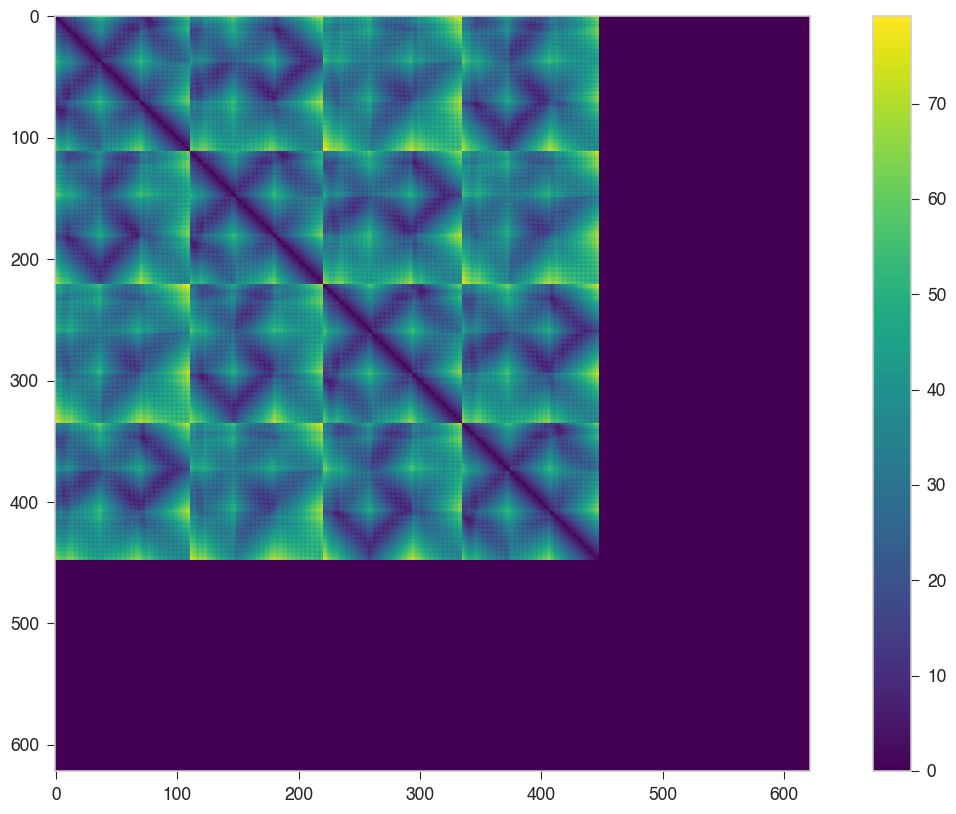

In [82]:
plt.imshow(r_matrix)
plt.colorbar()

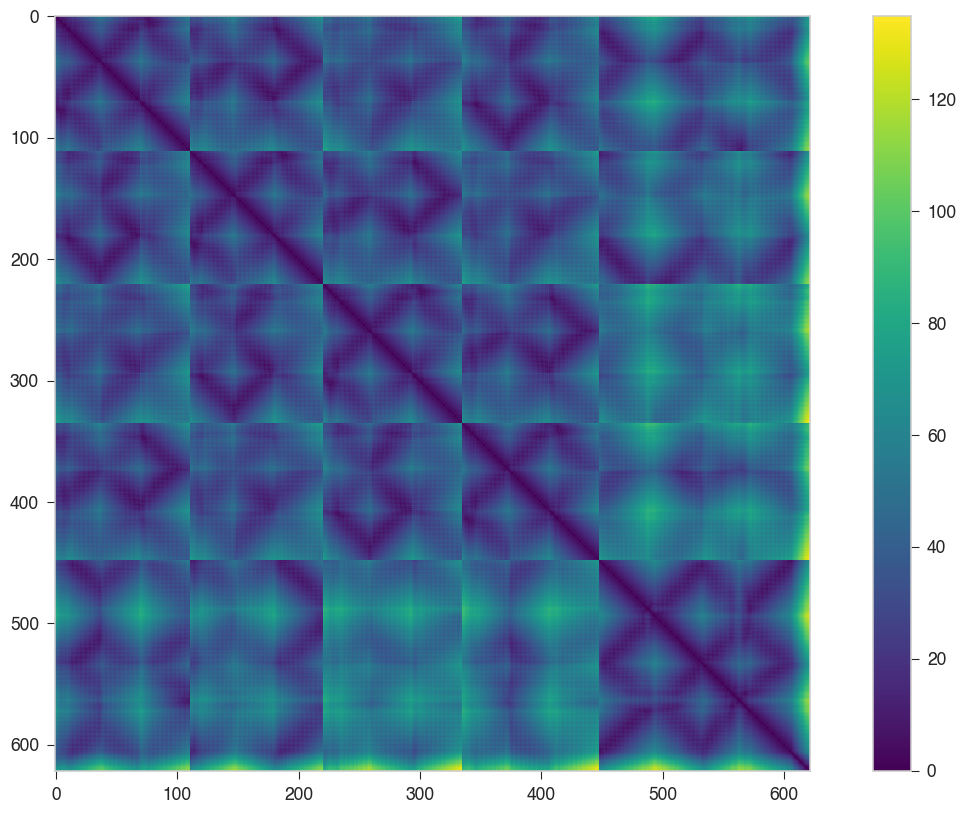

In [73]:
plt.imshow(r_matrix)
plt.colorbar()

In [25]:
"A" in "ABC"

True

In [26]:
"A" in "BC"

False

In [ ]:
221+114 335+113 448+ 174 622